**Linear Algebra : Python Project**

**Image Processing Application(Manipulation and Editing)**
***
**Komal Neupane and Asif Tauhid**


Mounted at /content/drive


<ipython-input-1-4467fac4de55>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


Displaying the original image.


array([[[ 60,  78, 118],
        [ 63,  76, 118],
        [ 53,  71, 111],
        ...,
        [  8,  33,  74],
        [  1,   3,  18],
        [ 11,  76,  80]],

       [[ 60,  78, 118],
        [ 65,  77, 119],
        [ 54,  72, 112],
        ...,
        [  0,   3,  24],
        [ 11,  60,  65],
        [ 38, 168, 168]],

       [[ 60,  78, 118],
        [ 65,  77, 119],
        [ 55,  73, 113],
        ...,
        [  7,  47,  55],
        [ 28, 162, 161],
        [ 24, 164, 165]],

       ...,

       [[ 31,  35,  64],
        [ 29,  40,  72],
        [ 30,  48,  86],
        ...,
        [  1,   9,  12],
        [  7,  13,  29],
        [ 29,  37,  50]],

       [[ 31,  35,  62],
        [ 28,  39,  71],
        [ 29,  47,  85],
        ...,
        [  9,  17,  19],
        [ 35,  47,  63],
        [ 47,  64,  80]],

       [[ 31,  35,  62],
        [ 28,  39,  71],
        [ 29,  47,  85],
        ...,
        [  4,  21,  28],
        [ 45,  65,  92],
        [ 27,  54,  84]]], dtype=uint8)
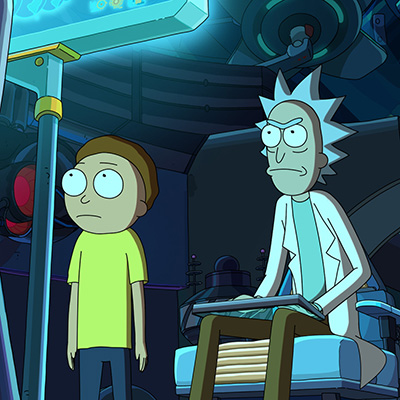

In [ ]:
#Mounting google drive with google collab
!pip install imageio
from google.colab import drive
drive.mount('/content/drive')

#importing libraries necessary to handle the imported image properly, as a matrix
import imageio
from IPython.display import display
import numpy as np

def load_image(image_path):
    img = imageio.imread(image_path)
    return img

# Loading the image from google drive
image_path = '/content/drive/MyDrive/machine learning/Copy of Copy of rick_morty.jpg'
# if you want to test it, you can copy the path on your drive and paste it in the image_path section
img = load_image(image_path)
print("Displaying the original image.")
display(img)


In [ ]:
#Function for the features

#Function for Cropping
def crop_image(image, start_row, start_col, end_row, end_col):
    return image[start_row:end_row, start_col:end_col]

#Function for Resizing
def resize_image(image, new_height, new_width):
    height_ratio = len(image) / new_height
    width_ratio = len(image[0]) / new_width
    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            resized_image[i, j] = image[int(i * height_ratio), int(j * width_ratio)]
    return resized_image



In [ ]:
import numpy as np

def rotate_image(image, angle):
    # Converting the angle from degrees to radians
    angle_rad = np.radians(angle)

    # Defining the rotation matrix based on the angle
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])

    # Getting the dimensions of the image
    height, width = image.shape[:2]

    # Calculating the center of the image
    center_x = width / 2
    center_y = height / 2

    # Calculating the new dimensions of the rotated image
    cos_theta = abs(np.cos(angle_rad))
    sin_theta = abs(np.sin(angle_rad))

    # Determining the new dimensions of the rotated image
    new_width = int((height * sin_theta) + (width * cos_theta))
    new_height = int((height * cos_theta) + (width * sin_theta))

    # Creating an empty array for the rotated image
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    # Calculating the center of the new image
    new_center_x = new_width / 2
    new_center_y = new_height / 2

    # Iterating over each pixel in the new image
    for y in range(new_height):
        for x in range(new_width):
            # Calculating the coordinates in the original image
            new_x_prime = (x - new_center_x)
            new_y_prime = (y - new_center_y)

            # Applying the inverse rotation matrix to find the original coordinates
            original_x_prime, original_y_prime = np.dot(np.linalg.inv(rotation_matrix), [new_x_prime, new_y_prime])

            # Translating back to the original coordinates
            original_x = original_x_prime + center_x
            original_y = original_y_prime + center_y

            # Using nearest-neighbor interpolation
            original_x_int = int(round(original_x))
            original_y_int = int(round(original_y))

            # Checking if the original coordinates are within bounds
            if 0 <= original_x_int < width and 0 <= original_y_int < height:
                # Setting the pixel value in the rotated image
                rotated_image[y, x] = image[original_y_int, original_x_int]

    return rotated_image


In [ ]:
import numpy as np

def zoom_image(image, zoom_factor):
    # Getting the dimensions of the original image
    height, width = image.shape[:2]

    # Calculating the new dimensions of the zoomed image
    new_height = int(height / zoom_factor)
    new_width = int(width / zoom_factor)

    # Creating an empty array for the zoomed image
    zoomed_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    # Defining the scaling matrix
    scaling_matrix = np.array([
        [1 / zoom_factor, 0],
        [0, 1 / zoom_factor]
    ])

    # Calculating the center of the original image
    center_x = width / 2
    center_y = height / 2

    # Calculating the center of the zoomed image
    new_center_x = new_width / 2
    new_center_y = new_height / 2

    # Iterating through each pixel in the zoomed image
    for y in range(new_height):
        for x in range(new_width):
            # Calculating the coordinates in the original image
            # Translating coordinates to the original image's center
            new_coords = np.array([x - new_center_x, y - new_center_y])

            # Applying the scaling matrix to find the original coordinates
            original_coords = np.dot(scaling_matrix, new_coords)

            # Translating coordinates back to the original image's center
            original_x = int(round(original_coords[0] + center_x))
            original_y = int(round(original_coords[1] + center_y))

            # Checking if the original coordinates are within bounds
            if 0 <= original_x < width and 0 <= original_y < height:
                # Setting the pixel value in the zoomed image
                zoomed_image[y, x] = image[original_y, original_x]

    return zoomed_image


Cropped out Rick!!


array([[[ 16,  87, 109],
        [ 18,  86, 109],
        [ 17,  85, 108],
        ...,
        [  1,  14,  31],
        [  1,  14,  30],
        [  1,  15,  28]],

       [[ 18,  86, 109],
        [ 18,  84, 108],
        [ 17,  83, 107],
        ...,
        [  1,  14,  30],
        [  1,  14,  30],
        [  0,  15,  30]],

       [[ 17,  81, 106],
        [ 16,  80, 105],
        [ 15,  80, 102],
        ...,
        [  2,  14,  30],
        [  0,  15,  30],
        [  0,  16,  31]],

       ...,

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 14,  20,  36],
        [ 17,  23,  39],
        [ 19,  26,  44]],

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 17,  21,  33],
        [ 17,  21,  33],
        [ 17,  21,  33]],

       [[ 21,  35,  46],
        [ 21,  35,  46],
        [ 21,  35,  46],
        ...,
        [ 17,  21,  33],
        [ 17,  21,  33],
        [ 17,  21,  33]]], dtype=uint8)
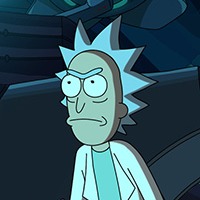

In [ ]:
# Applying the crop function
#Making use of specific row and col number as arguments to get specific starting and ending pixel
#Here, we have used specific number to crop out rick, the character we can see below
start_row = 50
start_col = 200
end_row = 250
end_col = 400

cropped_img = crop_image(img, start_row, start_col, end_row, end_col)
print("Cropped out Rick!!")
display(cropped_img)




array([[[ 60,  78, 118],
        [ 53,  71, 111],
        [102, 137, 167],
        ...,
        [  0,  43,  76],
        [  4,  39,  69],
        [  1,   3,  18]],

       [[ 60,  78, 118],
        [ 55,  73, 113],
        [ 95, 130, 160],
        ...,
        [  4,  33,  77],
        [  4,   1,  22],
        [ 28, 162, 161]],

       [[ 62,  77, 118],
        [ 58,  76, 116],
        [ 93, 128, 158],
        ...,
        [  1,  32,  60],
        [ 32, 115, 119],
        [ 32, 135, 140]],

       ...,

       [[ 28,  34,  66],
        [ 30,  50,  87],
        [ 29,  48,  88],
        ...,
        [ 35,  58,  92],
        [ 41,  63, 100],
        [ 10,  15,  35]],

       [[ 30,  35,  64],
        [ 30,  48,  86],
        [ 29,  48,  88],
        ...,
        [ 15,  31,  46],
        [ 33,  47,  84],
        [  5,  17,  31]],

       [[ 31,  35,  62],
        [ 29,  47,  85],
        [ 29,  48,  90],
        ...,
        [ 17,  33,  49],
        [ 25,  33,  44],
        [ 35,  47,  63]]], dtype=uint8)
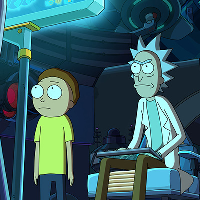

In [ ]:
# Applying resize function
#Using specific number as arguments to get the preferred new height and width

#Here new height and width were used as 200
height = 200
width = 200

resized_img = resize_image(img, height, width)
display(resized_img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
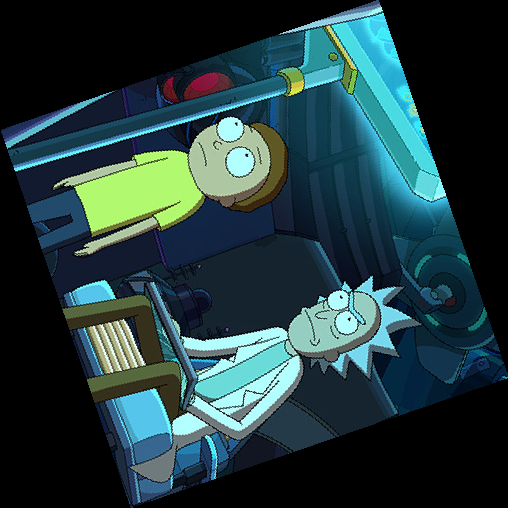

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 27,  54,  84],
        [ 45,  65,  92],
        ...,
        [ 27,  49,  90],
        [ 29,  47,  85],
        [ 28,  39,  71]],

       [[  0,   0,   0],
        [ 47,  64,  80],
        [ 35,  47,  63],
        ...,
        [ 27,  49,  90],
        [ 29,  47,  85],
        [ 28,  39,  71]],

       ...,

       [[  0,   0,   0],
        [ 27, 125, 138],
        [ 27, 175, 177],
        ...,
        [ 64,  82, 120],
        [ 57,  75, 115],
        [ 65,  77, 119]],

       [[  0,   0,   0],
        [ 24, 164, 165],
        [ 28, 162, 161],
        ...,
        [ 67,  85, 123],
        [ 55,  73, 113],
        [ 65,  77, 119]],

       [[  0,   0,   0],
        [ 38, 168, 168],
        [ 11,  60,  65],
        ...,
        [ 72,  90, 128],
        [ 54,  72, 112],
        [ 65,  77, 119]]], dtype=uint8)
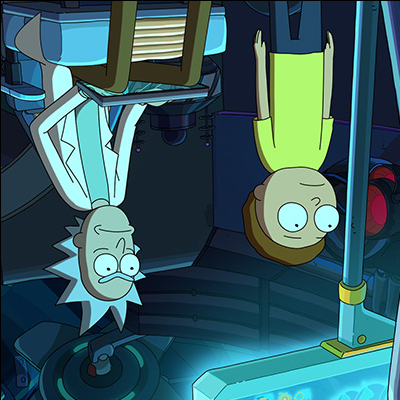

In [ ]:
# Applying the rotate function
#the function is not limited to the standard rotations in the multiples of 90, as we have implemented the function above for any angle

#here 71 and 180 were used as the desired angles for demonstration
angle = 71

rotated_img = rotate_image(img, angle)
display(rotated_img)

angle = 180

rotated_img = rotate_image(img, angle)
display(rotated_img)

array([[[ 12,  59,  77],
        [ 13,  60,  78],
        [ 14,  61,  79],
        ...,
        [121, 217, 241],
        [121, 217, 241],
        [120, 216, 240]],

       [[ 13,  60,  78],
        [ 12,  59,  77],
        [ 13,  60,  78],
        ...,
        [130, 236, 252],
        [130, 236, 252],
        [120, 221, 241]],

       [[ 21,  68,  88],
        [ 18,  65,  83],
        [ 15,  62,  80],
        ...,
        [ 96, 167, 189],
        [ 96, 167, 189],
        [132, 220, 240]],

       ...,

       [[177, 249, 111],
        [177, 249, 111],
        [177, 249, 111],
        ...,
        [ 41,  47,  63],
        [ 41,  47,  63],
        [ 55,  82,  99]],

       [[177, 249, 111],
        [177, 249, 111],
        [177, 249, 111],
        ...,
        [ 41,  47,  63],
        [ 41,  47,  63],
        [ 55,  82,  99]],

       [[177, 249, 111],
        [177, 249, 111],
        [177, 249, 111],
        ...,
        [ 31,  35,  44],
        [ 31,  35,  44],
        [ 30,  39,  54]]], dtype=uint8)
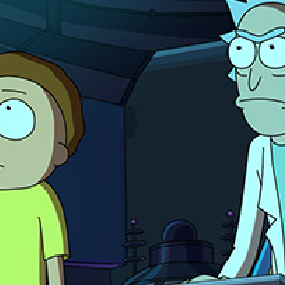

In [ ]:
# Applying the zoom function
# we have to pass zoom_factor for the intensity of the zoom we would like to attain
zoom_factor=1.4
zoomed_img = zoom_image(img, zoom_factor)
display(zoomed_img)